### Assess Memory (Recognition) Performance

The goal of this notebook is to read in the prepared memory files (which have been sorted in the previous notebook based on whether participants later recalled them (or not). Plus, we kept track of the condition (100, 50nd, 50wd) in which they viewed the spots. We'll simply compute the overall memory performance by spots and compare which condition yielded the best performance.


In [6]:
import os, glob, warnings, re, shutil
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [7]:
# prepare spots
spot_list = ['commercial_aribnb_30s', 'commercial_att_30s', 'commercial_carscom_30s','commercial_cookies_30s',
             'commercial_dominos_30s', 'commercial_doritos_30s','commercial_expedia_30s','commercial_google_pixel_30s',
             'commercial_hr_block_30s','commercial_jersey_mikes_30s','commercial_lego_30s','commercial_meta_quest_2_30s',
             'commercial_milk_30s','commercial_progressive_30s','commercial_publix_30s','commercial_puma_30s',
             'commercial_starbucks_30s','commercial_under_armour_30s',
             'health_alcohol_30s','health_alzheimers_30s','health_covid_vaccine_30s','health_diet_30s',
             'health_drunk_driving_30s','health_fitness_30s','health_kidney_30s','health_mantherapy_30s',
             'health_prediabetes_30s','health_stroke_30s','health_vaping_30s','health_weight_30s']

n_spots = len(spot_list)

spot_list.sort()
print(len(spot_list))
print(spot_list[:3])

# prepare subject list
sub_folders = glob.glob("../data/00_raw_data/sub*")
sub_folders.sort()
subject_list = []
for f in sub_folders:
    subject_list.append(f[-6:])

n_subjects = len(subject_list)
print(n_subjects)
print(subject_list[:3])

condition_list = ['100', '50nd', '50wd']
n_conditions = len(condition_list)

30
['commercial_aribnb_30s', 'commercial_att_30s', 'commercial_carscom_30s']
59
['sub001', 'sub002', 'sub003']


In [8]:
recognition_results = np.zeros((n_spots, 6))

for current_spot_index in range(n_spots):
    current_spot = spot_list[current_spot_index]
    #print(current_spot)
    
    for current_condition_index in range(n_conditions):  # 0, 1, 2

        current_condition = condition_list[current_condition_index]
        curr_search_folder = '../data/03_spots_memory_data/' + current_spot + '/' + current_condition + '/' 
        #print(curr_search_folder)

        recognized = glob.glob(os.path.join(curr_search_folder, '*recognition1.csv'))
        n_recognized = len(recognized)

        not_recognized = glob.glob(os.path.join(curr_search_folder, '*recognition0.csv'))
        n_notrecognized = len(not_recognized)
        
        recognition_results[current_spot_index, current_condition_index]      = n_recognized
        recognition_results[current_spot_index, current_condition_index + 3 ] = n_notrecognized
        
df = pd.DataFrame(recognition_results, 
             columns = ['100_recognition','50nd_recognition','50wd_recognition','100_norecognition','50nd_norecognition','50wd_norecognition'],
             index = spot_list)

df.head()

,100_recognition,50nd_recognition,50wd_recognition,100_norecognition,50nd_norecognition,50wd_norecognition
commercial_aribnb_30s,17.0,18.0,17.0,3.0,1.0,3.0
commercial_att_30s,19.0,14.0,11.0,0.0,6.0,9.0
commercial_carscom_30s,16.0,13.0,13.0,4.0,5.0,7.0
commercial_cookies_30s,19.0,18.0,17.0,1.0,1.0,3.0
commercial_dominos_30s,20.0,17.0,16.0,0.0,1.0,4.0


In [9]:
df.to_csv('../data/03_spots_memory_data/aggregated_recognition_by_spots_reproduce.csv')


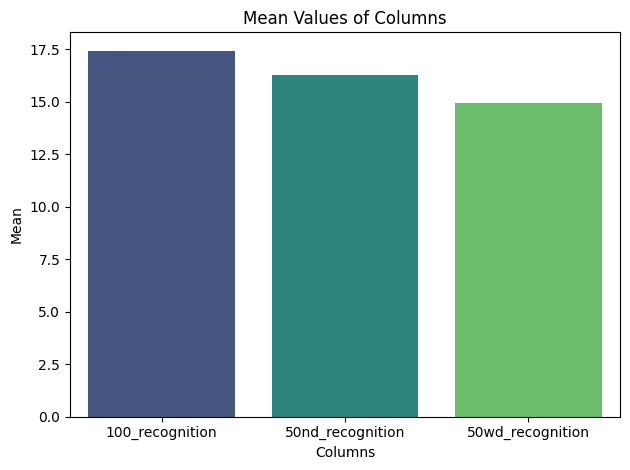

In [10]:
column_means = df.mean()[:3]
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=column_means.index, y=column_means.values[:3], palette='viridis')
plt.title('Mean Values of Columns')
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()

plt.show()


